In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [39]:
# How large is each group?
print(experiment_data.test.value_counts(), "\n")


# What is the signup rate of test and control?
test = experiment_data[(experiment_data['test']==1) & (experiment_data['is_signed_up']==1)].test.count()
test_total = experiment_data[experiment_data['test']==1].test.count()
control = experiment_data[(experiment_data['test']==0) & (experiment_data['is_signed_up']==1)].test.count()
control_total = experiment_data[experiment_data['test']==0].test.count()
print("Test signup rates: ", test/test_total, "\n")
print("Control signup rates: ", control/control_total, "\n")

# Is the experiment already significant?

stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up, experiment_data[experiment_data.test == 0].is_signed_up)

0    30241
1     3372
Name: test, dtype: int64 

Test signup rates:  0.13701067615658363 

Control signup rates:  0.14708508316523924 



Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

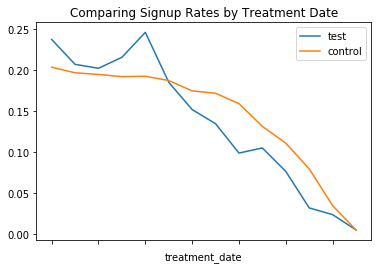

T-Test Results by Date
Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.6953630758340448)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.8094651742723448)
Ttest_indResult(statistic=1.006146671265253, pvalue=0.3144281887767212)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.0727950243234006)
Ttest_indResult(statistic=-0.07142256949339083, pvalue=0.943068118381282)
Ttest_indResult(statistic=-0.99645401324533, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.1598930922410899)
Ttest_indResult(statistic=-2.772772511643487, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.559540254853317, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.851793126290792, pvalue=0.3944212121535955)
Ttest_indResult(s

In [46]:
fig = experiment_data[experiment_data.test==1][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()
print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up, dated_data[dated_data.test == 0].is_signed_up))

In [50]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data2 = pd.read_csv(PATH)

In [51]:
# How large is each group?
print('test sample size:', len(experiment_data2[experiment_data2.test == 1]))
print('control sample size:', len(experiment_data2[experiment_data2.test == 0]))
print('test proportion:', experiment_data2.test.mean())
print()

# What is the signup rate of test and control?
print('test signup rate:', experiment_data2[experiment_data2.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data2[experiment_data2.test == 0].is_signed_up.mean())

# Is the experiment already significant?
stats.ttest_ind(
    experiment_data2[experiment_data2.test == 1].is_signed_up,
    experiment_data2[experiment_data2.test == 0].is_signed_up)

test sample size: 19861
control sample size: 46867
test proportion: 0.2976411701234864

test signup rate: 0.2421328231206888
control signup rate: 0.19937269293959503


Ttest_indResult(statistic=12.368130184147793, pvalue=4.248167714911685e-35)

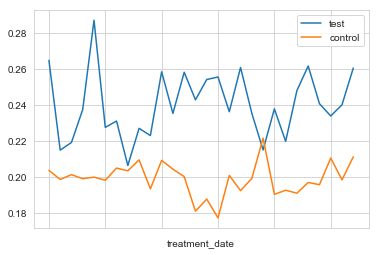

In [58]:
test = experiment_data2[experiment_data2.test==1]
control = experiment_data2[experiment_data2.test==0]
fig = test[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
control[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test', 'control'])
plt.show()